# Adversarial Attacks Against Eye Tracking Data

In [16]:
import numpy as np
import pandas as pd
import sklearn
from Reader.Reader import * 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_roc_curve

## Base Model
The first part is setting up our base model. 
Here we will try to use different modelts to see whether we can predict if the user is engaged or not engaged to a work of art. 

### Load Dataframe 

In [2]:
Eye_Data_Path = "/home/franciscoAML/Documents/Privacy_Adversarial_Example/Eye_Data"
Dataframe = Reader(Eye_Data_Path).load_file()
print(Dataframe.shape)

Number of Files: 30
(30, 15)


In [3]:
# Read the Column Names
for col in Dataframe.columns:
    print(col)

Engagement
Average Blink Rate
Focus Ratio
Average Focus Deviation Rate
Number of Focused Fixations
Mean Focused Fixation Duration
Median Focused Fixation Duration
Time to First Fixation
RFDSD
Standard Deviation (X)
Standard Deviation (Y)
Standard Distance (XY)
Number of Saccades
Mean Focused Saccade Amplitude
Median Focused Saccade Amplitude


### Split the Dataframe
Here we need to split the dataset into x and y. Y being whether the user is engaged or not engaged. 


In [4]:
Y = pd.DataFrame(Dataframe["Engagement"])
X = Dataframe.drop(["Engagement"], axis=1)
print("Y Shape:", Y.shape)
print("X Shape:", X.shape)

Y Shape: (30, 1)
X Shape: (30, 14)


## Split the Model Into Cross Validation Dataset
Will use 70% for training and 30% for testing

In [5]:
# Import Necessary Package
from sklearn.model_selection import train_test_split

# Proceed to make the split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=.3)
print("Size of Training Dataset:", len(X_train))
print("Size of Testing Dataset:", len(X_test))

Size of Training Dataset: 21
Size of Testing Dataset: 9


## Models

Training Results
Accuracy on Training: 0.857
Precision on Training: 0.8
Recall on Training: 0.889

Testing Results
Accuracy on Training: 0.444
Precision on Training: 0.6
Recall on Training: 0.5


/home/franciscoAML/anaconda3/envs/AI/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


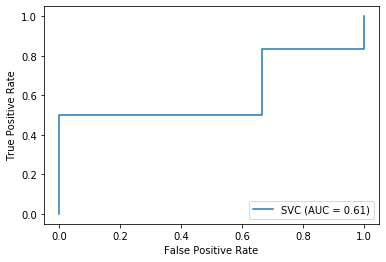

In [17]:
### Linear Support Vector Machine
from sklearn import svm

## Proceed To Prepare Linear SVM 
linear_svc = svm.SVC(kernel='linear')
linear_svc.fit(X_train, Y_train)

## Proceed to Test Performance on the Training Dataset
Y_train_predict = linear_svc.predict(X_train)

## Proceed to write accuracy
train_accuracy = accuracy_score(Y_train,Y_train_predict)
train_precision = precision_score(Y_train, Y_train_predict)
train_recall = recall_score(Y_train, Y_train_predict)

print("Training Results")
print("Accuracy on Training:", round(train_accuracy,3))
print("Precision on Training:", round(train_precision, 3))
print("Recall on Training:", round(train_recall,3))

## Proceed to Test on Testing Dataset
Y_test_predict = linear_svc.predict(X_test)

# Proceed to Calculate Scores
test_accuracy = accuracy_score(Y_test,Y_test_predict)
test_precision = precision_score(Y_test, Y_test_predict)
test_recall = recall_score(Y_test, Y_test_predict)

print("\nTesting Results")
print("Accuracy on Training:", round(test_accuracy,3))
print("Precision on Training:", round(test_precision, 3))
print("Recall on Training:", round(test_recall,3))

## Proceed to Graph ROC Curve
plot_roc_curve(linear_svc, X_test, Y_test)

Training Results
Accuracy on Training: 0.667
Precision on Training: 1.0
Recall on Training: 0.222

Testing Results
Accuracy on Training: 0.556
Precision on Training: 1.0
Recall on Training: 0.333


/home/franciscoAML/anaconda3/envs/AI/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


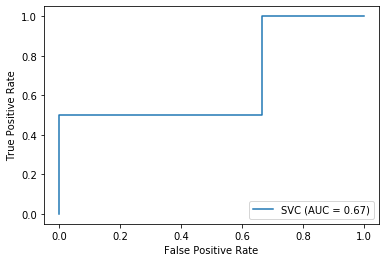

In [18]:
### RBF Support Vector Machine
from sklearn import svm

## Proceed To Prepare Linear SVM 
rbf_svc = svm.SVC(kernel='rbf')
rbf_svc.fit(X_train, Y_train)

## Proceed to Test Performance on the Training Dataset
Y_train_predict = rbf_svc.predict(X_train)

## Proceed to write accuracy
train_accuracy = accuracy_score(Y_train,Y_train_predict)
train_precision = precision_score(Y_train, Y_train_predict)
train_recall = recall_score(Y_train, Y_train_predict)

print("Training Results")
print("Accuracy on Training:", round(train_accuracy,3))
print("Precision on Training:", round(train_precision, 3))
print("Recall on Training:", round(train_recall,3))

## Proceed to Test on Testing Dataset
Y_test_predict = rbf_svc.predict(X_test)

# Proceed to Calculate Scores
test_accuracy = accuracy_score(Y_test,Y_test_predict)
test_precision = precision_score(Y_test, Y_test_predict)
test_recall = recall_score(Y_test, Y_test_predict)

print("\nTesting Results")
print("Accuracy on Training:", round(test_accuracy,3))
print("Precision on Training:", round(test_precision, 3))
print("Recall on Training:", round(test_recall,3))

## Proceed to Graph ROC Curve
plot_roc_curve(rbf_svc, X_test, Y_test)